In [117]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_DF_AK=pd.read_csv('namesbystate/AK.txt', delimiter=',', names=['State','Sex','Year Born','Name','Name Frequency'])
train_DF_AK.head()

,State,Sex,Year Born,Name,Name Frequency
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


1.  Please describe the format of the data files. Can you identify any 
    limitations or distortions of the data? 

**The list of names for each states is a comma delimited text file which 5 columns describing the State, Sex, Year Born, Names, and Name Frequency**

In [7]:
##Creating a big DataFrame (train_DF_popular) containing the data from all states##
train_DF_all=pd.DataFrame()
for fil in glob.glob('./namesbystate/*.TXT'):
     train_DF_all=train_DF_popular.append(pd.read_csv(fil, delimiter=',', names=['State','Sex','Year Born','Name',\
                                                                                     'Name Frequency']), ignore_index=True)

In [8]:
##Grouping by Name and couting the total frequency for each name to find the most popular name##
train_DF_total_freq=train_DF_all.groupby('Name').sum()['Name Frequency']
print "The most popular name of all time is:", train_DF_total_freq.idxmax(),'\n','With total count of:',\
train_DF_total_freq.ix[train_DF_total_freq.idxmax()]

The most popular name of all time is: James 
With total count of: 4965188


What is the most popular name of all time? (Of either gender.)

The most popular name of all time is: **James** With total count of **4957166**

In [9]:
female_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2013].groupby(['Sex','Name']).sum()['Name Frequency'].ix['F'])
male_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2013].groupby(['Sex','Name']).sum()['Name Frequency'].ix['M'])
male_female_inner_join=pd.concat([female_names, male_names], axis=1, join='inner')
print male_female_inner_join.sum(axis=1).idxmax()
print male_female_inner_join.sum(axis=1).max()

Emma
20911


In [10]:
female_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1945].groupby(['Sex','Name']).sum()['Name Frequency'].ix['F'])
male_names=pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1945].groupby(['Sex','Name']).sum()['Name Frequency'].ix['M'])
male_female_inner_join=pd.concat([female_names, male_names], axis=1, join='inner')
print male_female_inner_join.sum(axis=1).idxmax()
print male_female_inner_join.sum(axis=1).max()

James
74755


3.  What is the most gender ambiguous name in 2013? 1945?

The most gender ambiguos name in 2013 is: **Emma** With total count of **20881**

The most gender ambiguos name in 1945 is: **James** With total count of **74651**

In [13]:
train_DF_all['Year Born'].max()

2014

In [92]:
names_1980 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1980].groupby('Name').sum()['Name Frequency'])
names_2014 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2014].groupby('Name').sum()['Name Frequency'])
names_1980_2014 = pd.merge(names_1980, names_2014, left_index=True, right_index=True, suffixes=['_1980', '_2014'], how='inner')
names_1980_2014['names_rate_increase']=100*(names_1980_2014['Name Frequency_2014']-names_1980_2014['Name Frequency_1980'])/\
                                    (names_1980_2014['Name Frequency_1980'])
largest_increase = names_1980_2014.ix[names_1980_2014['names_rate_increase'].idxmax()]
print "%s has had the largest increase of %d percent" %(names_1980_2014['names_rate_increase'].idxmax(),largest_increase['names_rate_increase'])

Colton has had the largest increase of 126840 percent


In [95]:
names_1980_2014['names_rate_decrease']=100*(names_1980_2014['Name Frequency_1980']-names_1980_2014['Name Frequency_2014'])/\
                                    (names_1980_2014['Name Frequency_2014'])
largest_decrease = names_1980_2014.ix[names_1980_2014['names_rate_decrease'].idxmax()]
print "%s has had the largest decrease of %f percent" %(names_1980_2014['names_rate_decrease'].idxmax(),largest_decrease['names_rate_decrease'])

Latoya has had the largest decrease of 49500.000000 percent


Of the names represented in the data, find the name that has had the largest 
    percentage increase in popularity since 1980. Largest decrease?
    
**Colton** has had the largest increase of **126840%**

**Latoya** has had the largest decrease of **49500%**


Can you identify names that may have had an even larger increase or decrease 
    in popularity?

In [100]:
names_1980 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==1980].groupby('Name').sum()['Name Frequency'])
names_2014 = pd.DataFrame(train_DF_all.ix[train_DF_all['Year Born']==2014].groupby('Name').sum()['Name Frequency'])
names_1980_2014 = pd.merge(names_1980, names_2014, left_index=True, right_index=True, suffixes=['_1980', '_2014'], how='outer').fillna(0)
names_1980_2014['names_rate_increase']=100*(names_1980_2014['Name Frequency_2014']-names_1980_2014['Name Frequency_1980'])/\
                                    (1+names_1980_2014['Name Frequency_1980'])
largest_increase = names_1980_2014.ix[names_1980_2014['names_rate_increase'].idxmax()]
print "%s has had the largest increase of %d percent" %(names_1980_2014['names_rate_increase'].idxmax(),largest_increase['names_rate_increase'])

Jayden has had the largest increase of 1342900 percent


In [101]:
names_1980_2014['names_rate_decrease']=100*(names_1980_2014['Name Frequency_1980']-names_1980_2014['Name Frequency_2014'])/\
                                    (1+names_1980_2014['Name Frequency_2014'])
largest_decrease = names_1980_2014.ix[names_1980_2014['names_rate_decrease'].idxmax()]
print "%s has had the largest decrease of %f percent" %(names_1980_2014['names_rate_decrease'].idxmax(),largest_decrease['names_rate_decrease'])

Tonya has had the largest decrease of 308100.000000 percent


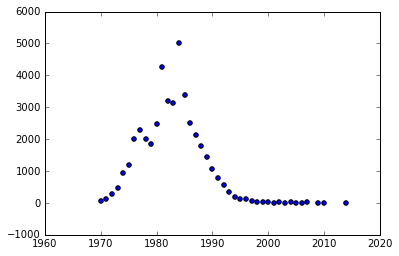

In [119]:
plt.scatter(train_DF_all.ix[train_DF_all['Name']=='Latoya'].groupby(['Year Born']).sum().index,\
            train_DF_all.ix[train_DF_all['Name']=='Latoya'].groupby(['Year Born']).sum()['Name Frequency'])

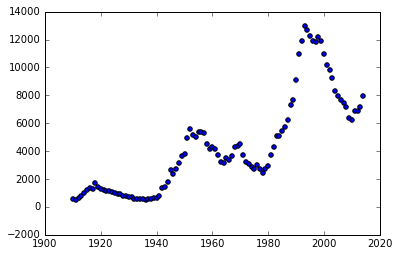

In [123]:
plt.scatter(train_DF_all.ix[train_DF_all['Name']=='Victoria'].groupby(['Year Born']).sum().index,\
            train_DF_all.ix[train_DF_all['Name']=='Victoria'].groupby(['Year Born']).sum()['Name Frequency'])

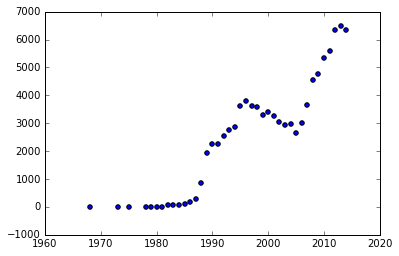

In [122]:
plt.scatter(train_DF_all.ix[train_DF_all['Name']=='Colton'].groupby(['Year Born']).sum().index,\
            train_DF_all.ix[train_DF_all['Name']=='Colton'].groupby(['Year Born']).sum()['Name Frequency'])